<a href="https://colab.research.google.com/github/This-is-joejoe/Trade_off-Between-over-fitting-and-under-fitting/blob/main/Trade_off_Between_over_fitting_and_under_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train = np.linspace(0,1,10) #training set
X_valid = np.linspace(0,1,100) # validation set
np.random.seed(6626)
t_valid = np.sin(4*np.pi*X_valid) + 0.3*np.random.randn(100) 
t_train = np.sin(4*np.pi*X_train) + 0.3*np.random.randn(10)

# reshape all the data
X_train = np.reshape(X_train,(10,1))
X_valid = np.reshape(X_valid,(100,1))
t_train = np.reshape(t_train,(10,1))
t_valid = np.reshape(t_valid,(100,1))


print(t_train)



[[ 0.6058247 ]
 [ 1.46209739]
 [ 0.00580809]
 [-0.76292381]
 [-0.72819461]
 [ 1.18365091]
 [ 1.07159364]
 [-0.74927163]
 [-1.37703819]
 [-0.2576355 ]]


In [ ]:

#add dummy column
dm_col = np.reshape(np.ones(10),(10,1))
X_T = np.concatenate((dm_col,X_train),axis = 1)
print(X_T)
dm_col_2 = np.reshape(np.ones(100),(100,1))
X_V = np.concatenate((dm_col_2,X_valid),axis = 1)
print(X_T.shape)
print(X_V.shape)

# construct X for M = 9
# later use Array Slicing to form X for different M
for i in range(2,10):
  X_T = np.concatenate((X_T,X_train**i),axis = 1)
  X_V = np.concatenate((X_V,X_valid**i),axis = 1)
print(X_T[1,:])
print(X_V[1,:])

[[1.         0.        ]
 [1.         0.11111111]
 [1.         0.22222222]
 [1.         0.33333333]
 [1.         0.44444444]
 [1.         0.55555556]
 [1.         0.66666667]
 [1.         0.77777778]
 [1.         0.88888889]
 [1.         1.        ]]
(10, 2)
(100, 2)
[1.00000000e+00 1.11111111e-01 1.23456790e-02 1.37174211e-03
 1.52415790e-04 1.69350878e-05 1.88167642e-06 2.09075158e-07
 2.32305731e-08 2.58117479e-09]
[1.00000000e+00 1.01010101e-02 1.02030405e-04 1.03061015e-06
 1.04102036e-08 1.05153571e-10 1.06215729e-12 1.07288615e-14
 1.08372338e-16 1.09467008e-18]


[[0.0453911]]
The training error between prediction and true label for Model(M=0) is 0.866986
The validation error between prediction and true label for Model(M=0) is 0.539521 

The validation error between prediction and true sin function for Model(M=0) is 0.497060 

[[ 0.70007541]
 [-1.30936863]]
The training error between prediction and true label for Model(M=1) is 0.692367
The validation error between prediction and true label for Model(M=1) is 0.513922 

The validation error between prediction and true sin function for Model(M=1) is 0.436786 

[[ 0.71166098]
 [-1.3875712 ]
 [ 0.07820257]]
The training error between prediction and true label for Model(M=2) is 0.692318
The validation error between prediction and true label for Model(M=2) is 0.513381 

The validation error between prediction and true sin function for Model(M=2) is 0.436703 

[[ 0.95593566]
 [-5.4093793 ]
 [10.6779788 ]
 [-7.06651748]]
The training error between prediction and true label for Model(M=3) is 0.663294
The

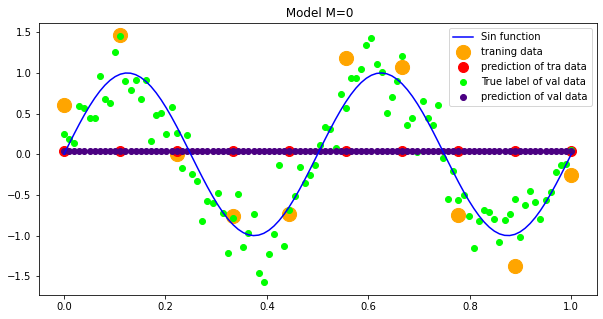

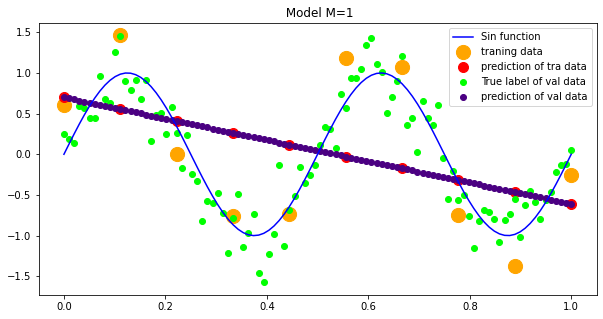

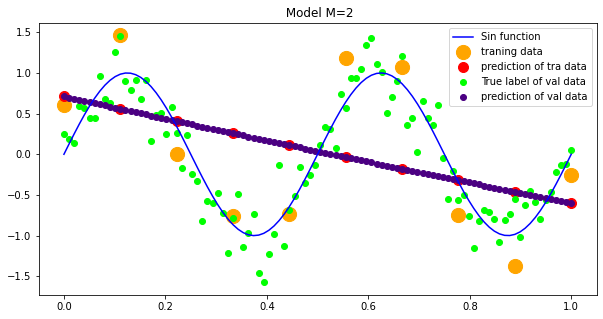

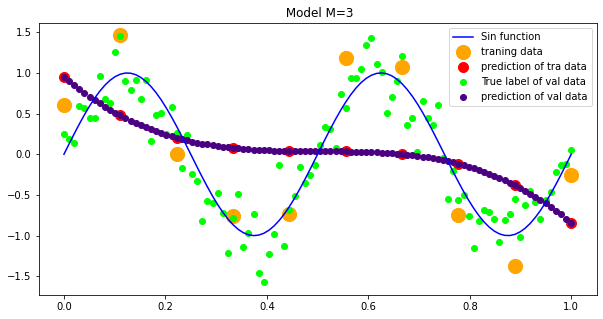

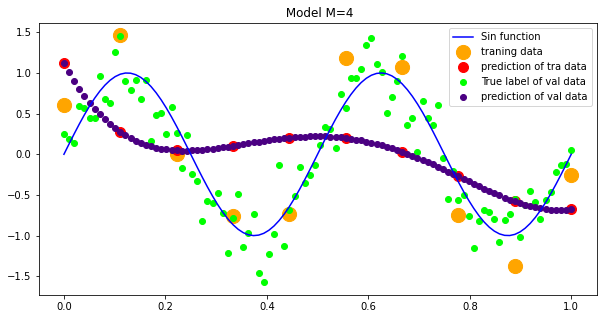

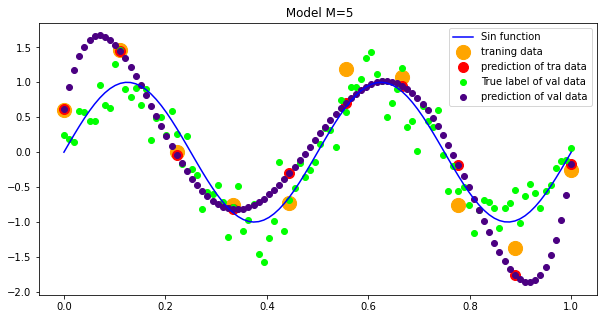

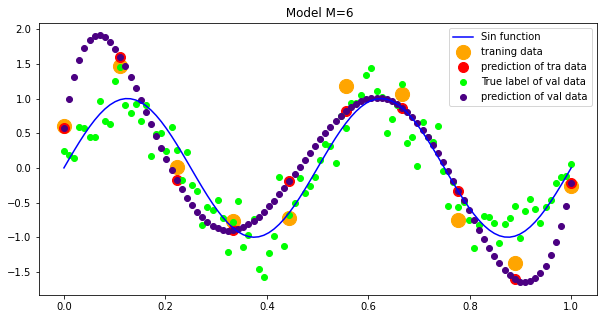

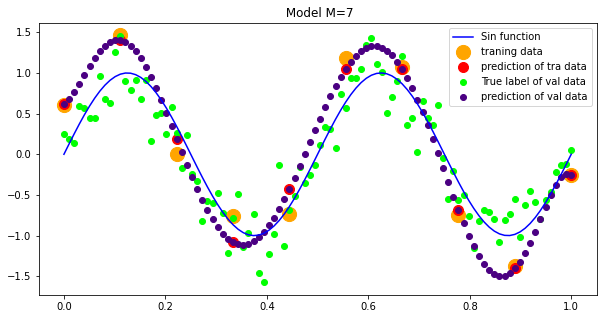

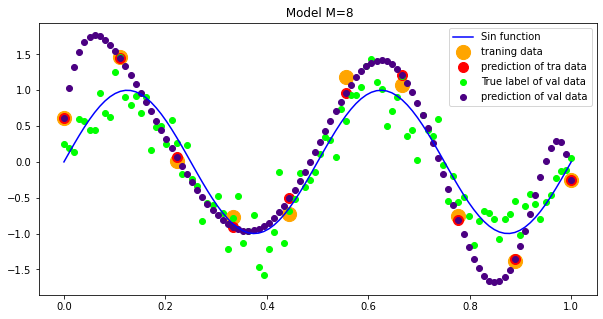

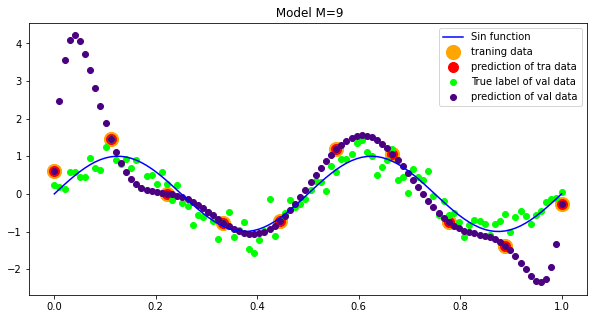

In [ ]:
#train and validating in for loop
err_T = np.zeros(shape=(10,1))
err_V = np.zeros(shape=(10,1))
err_V_sin = np.zeros(shape=(10,1))

#print(err)
#train the model ten times via for loop 
#After each time of training the code plots the following:
#1.true training data 
#2.true validation data 
#3.prediction of the model for training data
#4.prediction of the model for validation data
#5.True sin function
for i in range(1,11):
  
  X = X_T[:,0:i]
  A = np.dot(X.T,X)
  C = np.dot(X.T,t_train)
  W = np.dot(np.linalg.inv(A),C)
  print(W)
  #calculate training errors between prediction and true label
  Y_T = np.dot(X,W)
  diff_T = np.subtract(t_train,Y_T)
  err_T[i-1] = np.dot(diff_T.T,diff_T)/10
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(1,1,1)
  print('The training error between prediction and true label for Model(M=%d) is %f' % (i-1,err_T[i-1]))

  #plot the prediction and labels for training data
  plt.title(" Model M=%d"% (i-1))
  ax.scatter(X_T[:,1],t_train,s= 200,color = 'orange',label = 'traning data')
  ax.scatter(X_T[:,1],Y_T,s= 100,color = 'r',label = 'prediction of tra data')

  #calculate validation errors between prediction and true label
  X = X_V[:,0:i]
  Y_V = np.dot(X,W)
  diff_V = np.subtract(t_valid,Y_V)
  err_V[i-1] = np.dot(diff_V.T,diff_V)/100
  print('The validation error between prediction and true label for Model(M=%d) is %f \n' % (i-1,err_V[i-1]))  

  #calculate validation errors between prediction and true sin function
  diff_V_sin = np.subtract(np.sin(4*np.pi*X_valid),Y_V)
  err_V_sin[i-1] = np.dot(diff_V_sin.T,diff_V_sin)/100 
  print('The validation error between prediction and true sin function for Model(M=%d) is %f \n' % (i-1,err_V_sin[i-1]))

  #plot the prediction and labels for valiation data
  ax.scatter(X_V[:,1],t_valid,color = 'lime',label ='True label of val data')
  ax.scatter(X_V[:,1],Y_V,color = 'indigo',label ='prediction of val data')
  
  #plot the true sine function
  ax.plot(np.linspace(0,1,100),np.sin(4*np.pi*np.linspace(0,1,100)),'b',label = 'Sin function')
  ax.legend()
  


  #print(diff)
plt.show()


[[8.66986327e-01]
 [6.92366805e-01]
 [6.92317589e-01]
 [6.63294368e-01]
 [6.39367653e-01]
 [8.99598224e-02]
 [7.73649623e-02]
 [2.51812041e-02]
 [1.46160317e-02]
 [1.66182290e-07]]
[[0.53952133]
 [0.51392199]
 [0.51338094]
 [0.44625596]
 [0.45536574]
 [0.31464078]
 [0.32136603]
 [0.16696035]
 [0.26176749]
 [1.13598564]]
[[0.49706035]
 [0.43678566]
 [0.43670322]
 [0.38052189]
 [0.39766252]
 [0.22003809]
 [0.24415828]
 [0.10264422]
 [0.20993051]
 [1.07485533]]


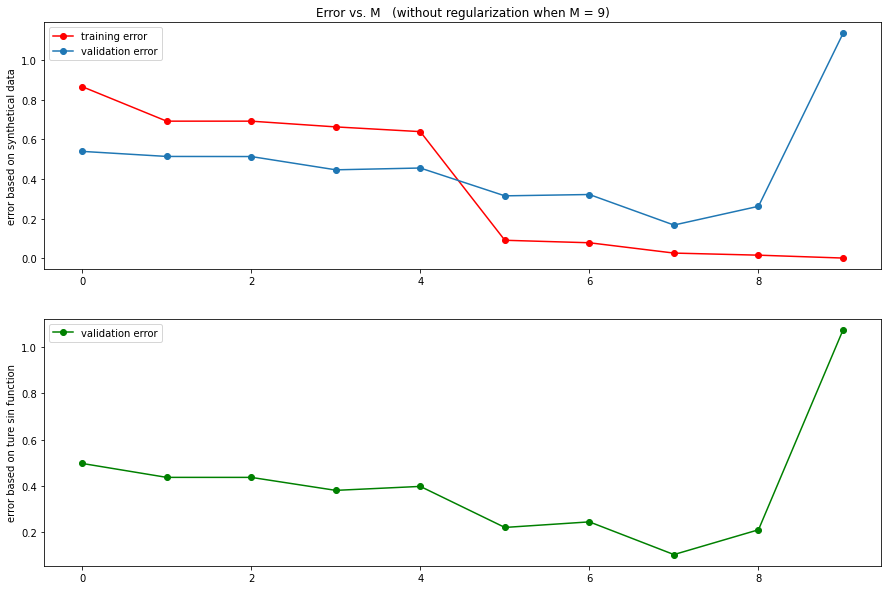

In [ ]:
print(err_T)
print(err_V)
print(err_V_sin)
#plot figure Capacity vs. error
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title('Error vs. M   (without regularization when M = 9)')
plt.plot(range(0,10),err_T,'o-',color = 'r',label = 'training error')
plt.plot(range(0,10),err_V,'o-',label = 'validation error')
plt.ylabel("error based on synthetical data")
plt.legend()

plt.subplot(212)
plt.plot(range(0,10),err_V_sin,'o-',color = 'g',label = 'validation error')
plt.ylabel("error based on ture sin function")
plt.legend()

plt.show()


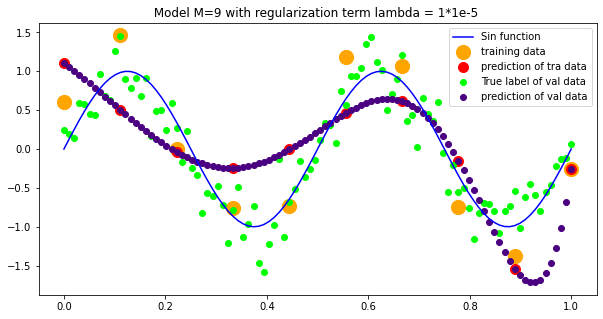

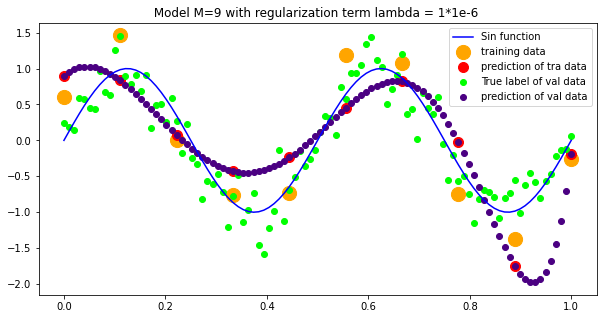

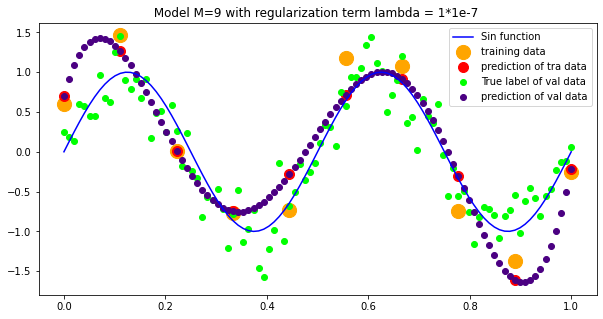

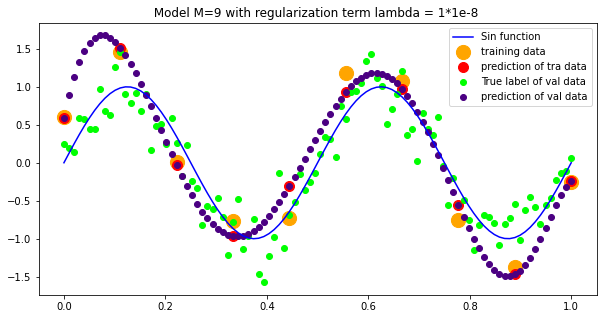

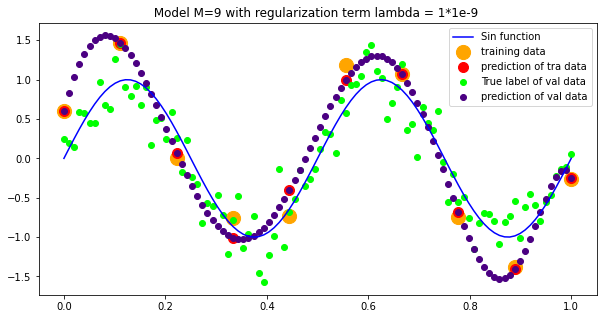

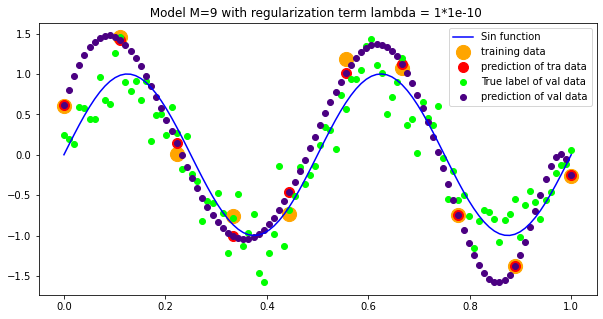

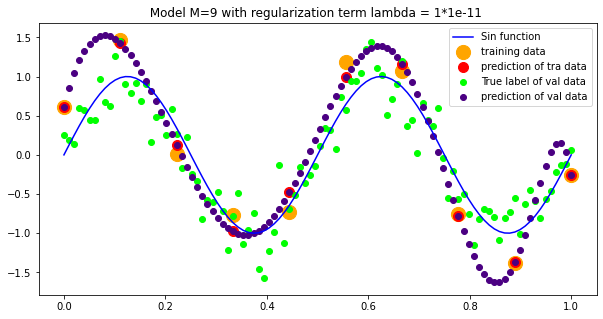

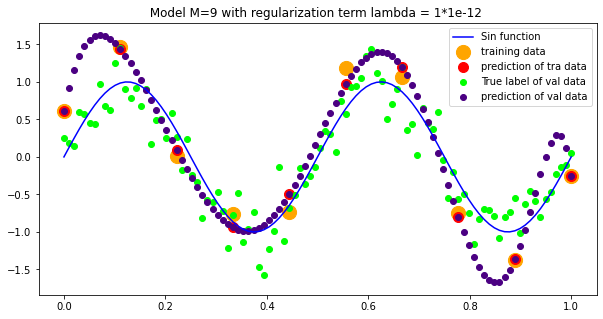

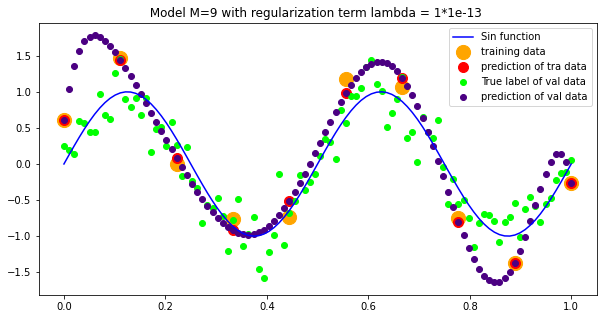

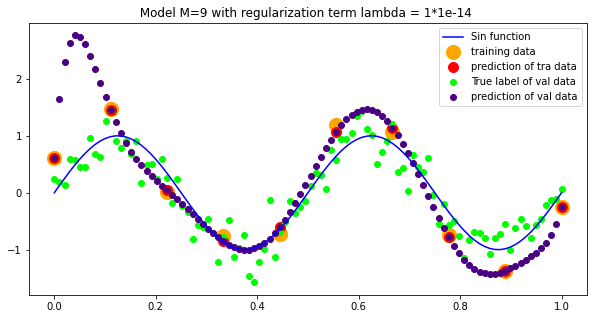

In [ ]:
# L2 regularization

err_T = np.zeros(shape=(10,1))
err_V = np.zeros(shape=(10,1))
err_V_sin = np.zeros(shape=(10,1))
#using loop to try diffenent lambda

for i in range(5,15):
  la = np.identity(10)*1*2/10**(i)
  la[0][0] = 0
  #print(la)
  A = np.dot(X_T.T,X_T)
  C = np.dot(X_T.T,t_train)
  B = 10/2*la

  W = np.dot(np.linalg.inv(np.add(A,B)),C)
  #print(W)
  #calculate training error for L2 model
  Y_T = np.dot(X_T,W)
  diff_T = np.subtract(t_train,Y_T)
  err_T[i-5] = np.dot(diff_T.T,diff_T)/10
  
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(1,1,1)
  plt.title(" Model M=9 with regularization term lambda = 1*1e-%d  "% (i))
  ax.scatter(X_T[:,1],t_train,s= 200,color = 'orange',label = 'training data')
  ax.scatter(X_T[:,1],Y_T,s= 100,color = 'r',label = 'prediction of tra data')

  #calculate validation error for L2 model
  Y_V = np.dot(X_V,W)
  diff_V = np.subtract(t_valid,Y_V)
  err_V[i-5] = np.dot(diff_V.T,diff_V)/100
  ax.scatter(X_V[:,1],t_valid,color = 'lime',label ='True label of val data')
  ax.scatter(X_V[:,1],Y_V,color = 'indigo',label ='prediction of val data')
  
  #calculate validation error based on ture sin fucntion for L2 model
  diff_V_sin = np.subtract(np.sin(4*np.pi*X_valid),Y_V)
  err_V_sin[i-5] = np.dot(diff_V_sin.T,diff_V_sin)/100 
  

  #plot true sine function
  ax.plot(np.linspace(0,1,100),np.sin(4*np.pi*np.linspace(0,1,100)),'b',label = 'Sin function')
  plt.legend()  
plt.show()

[[0.30782694]
 [0.20970936]
 [0.07502307]
 [0.03483387]
 [0.02143319]
 [0.01837311]
 [0.01685585]
 [0.01588506]
 [0.01362766]
 [0.00454886]]
[[0.34454259]
 [0.33060035]
 [0.23061252]
 [0.21991157]
 [0.1950592 ]
 [0.19028632]
 [0.20795724]
 [0.23490458]
 [0.25351074]
 [0.46272244]]
[[0.25582472]
 [0.22362743]
 [0.1449173 ]
 [0.15403305]
 [0.13461708]
 [0.13196191]
 [0.15214715]
 [0.18163933]
 [0.2001843 ]
 [0.40615113]]


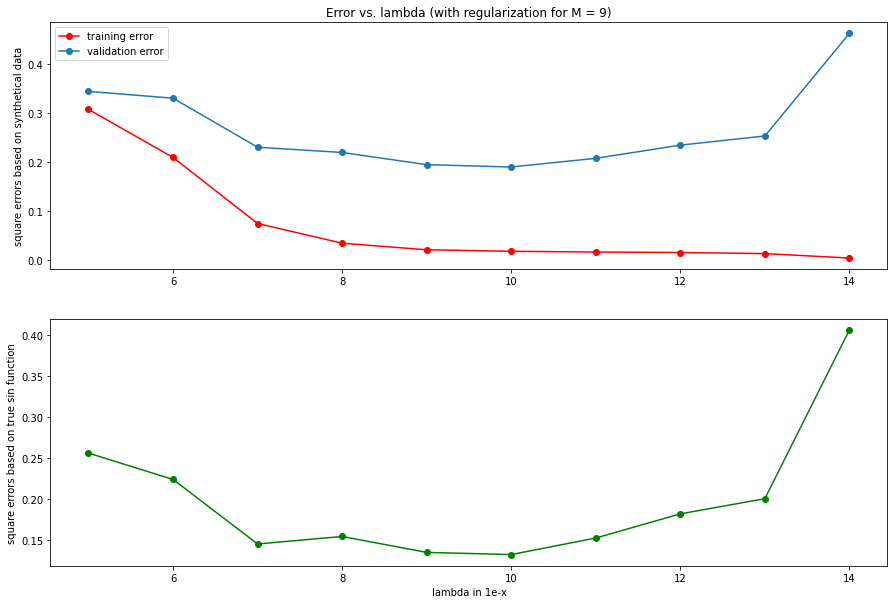

In [ ]:
#plot error vs. lambda

print(err_T)
print(err_V)
print(err_V_sin)


plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title('Error vs. lambda (with regularization for M = 9)')
plt.plot(range(5,15),err_T,'o-',color = 'r',label = 'training error')
plt.plot(range(5,15),err_V,'o-',label = 'validation error')

plt.ylabel('square errors based on synthetical data')
plt.legend()



plt.subplot(212)
plt.plot(range(5,15),err_V_sin,'o-',color = 'g',label = 'validation error')


plt.ylabel('square errors based on true sin function')
plt.xlabel('lambda in 1e-x')


plt.show()